In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

In [2]:
#Number 1
def f(x) :
    return np.cos(((np.pi)/2)*x**2)

In [3]:
#Left and Right
def left(f,a,b,N):
    h = (b-a)/(N-1)
    x=np.linspace(a,b,N)
    L = h*np.sum(f(x[:-1]))
    return L

In [4]:
def right(f,a,b,N):
    h = (b-a)/(N-1)
    x=np.linspace(a,b,N)
    R = h*np.sum(f(x[1:]))
    return R

In [5]:
#Trapezoid
def trap(f,a,b,N):
    h = (b-a)/(N-1)
    x=np.linspace(a,b,N)
    w = np.ones(N)
    w[1:-1] = 2
    T = (h/2)*np.dot(f(x),w)
    return T

In [6]:
#Midpoint Rule
def mid(f,a,b,N):
    h = (b-a)/(N-1)
    x=np.linspace(a,b,N)
    c= (x[:-1]+x[1:])/2 # Compute midpoints
    #print(len(x))
    #print(len(c))
    M = h*np.sum(f(c))
    return M

In [7]:
#Simpson's Rule
def simp(f,a,b,N):
    h = (b-a)/(N-1)
    x=np.linspace(a,b,N)
    w = np.ones(N)
    w[1:-1:2] = 4
    w[2:-1:2] = 2
    S = (h/3)*np.dot(f(x),w)
    return S

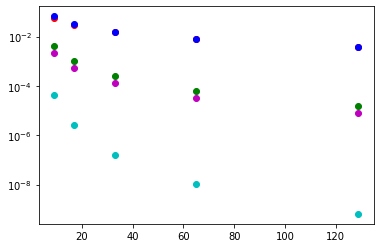

In [8]:
a,b = 0,1
nn = [9,17,33,65,129]
leftoutput = []
rightoutput = []
trapoutput = []
midoutput = []
simpoutput = []

for k in nn:
    leftoutput.append(left(f,a,b,k))
    rightoutput.append(right(f,a,b,k))
    trapoutput.append(trap(f,a,b,k))
    midoutput.append(mid(f,a,b,k))
    simpoutput.append(simp(f,a,b,k))
    

lefterr = []
righterr = []
traperr = []
miderr = []
simperr = []
p = 0
for p in range(len(rightoutput)):
    lefterr.append(np.fabs(leftoutput[p]-special.fresnel(1)[1]))
    righterr.append(np.fabs(rightoutput[p]-special.fresnel(1)[1]))
    traperr.append(np.fabs(trapoutput[p]-special.fresnel(1)[1]))
    miderr.append(np.fabs(midoutput[p]-special.fresnel(1)[1]))
    simperr.append(np.fabs(simpoutput[p]-special.fresnel(1)[1]))

plt.semilogy(nn,lefterr,'ro',nn,righterr,'bo',nn,traperr,'go',nn,miderr,'mo',nn,simperr,'co') 

In [9]:
#Number 3
def g(x):
    return np.exp(-0.2*x**2)-((np.sin(x))/x)

In [10]:
def gp(x):
    return (g(x+g(x))-g(x))/(g(x))

In [11]:
x = 2
MAXITS = 6
tol = 1e-8
k = 0
err = 1

while err > tol and k < MAXITS:
    eta = g(x)/gp(x)
    x = x - eta
    err = np.fabs(eta)
    k +=1
    
print(x)
print(err)
print(k)

2.0663938632996914
1.2547744780995713e-10
4


In [12]:
#Number 4
def A(r):
    P=1200
    return P*(1-(1+r/12)**(-360))-199000*(r/12)

In [13]:
def Ap(r):
    P = 1200
    return (A(r+A(r))-A(r))/(A(r))

In [14]:
r = .1
MAXITS = 10
tol = 1e-8
k = 0
err = 1

while err > tol and k < MAXITS:
    eta = A(r)/Ap(r)
    r = r - eta 
    err = np.fabs(eta)
    k +=1
    
print(r)
print(err)
print(k)

0.061408681405920554
1.031201154035984e-237
4
